In [ ]:
import numpy as np
from skimage import filters
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

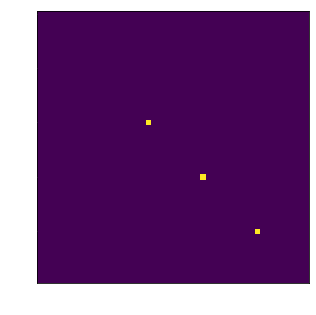

In [103]:
I = np.zeros((50,50))
I[20,20]=1
I[30,30]=1
I[40,40]=1
#I[4,14]=1

plt.figure(figsize=(5,5))
plt.imshow(I)

In [104]:
thetas = np.arange(0, np.pi, 0.02)
display("Theta has: "+ str(thetas.size)+" values.")

'Theta has: 158 values.'

Text(0, 0.5, 'Rhos - posunutie ak chcem trafit hranu')

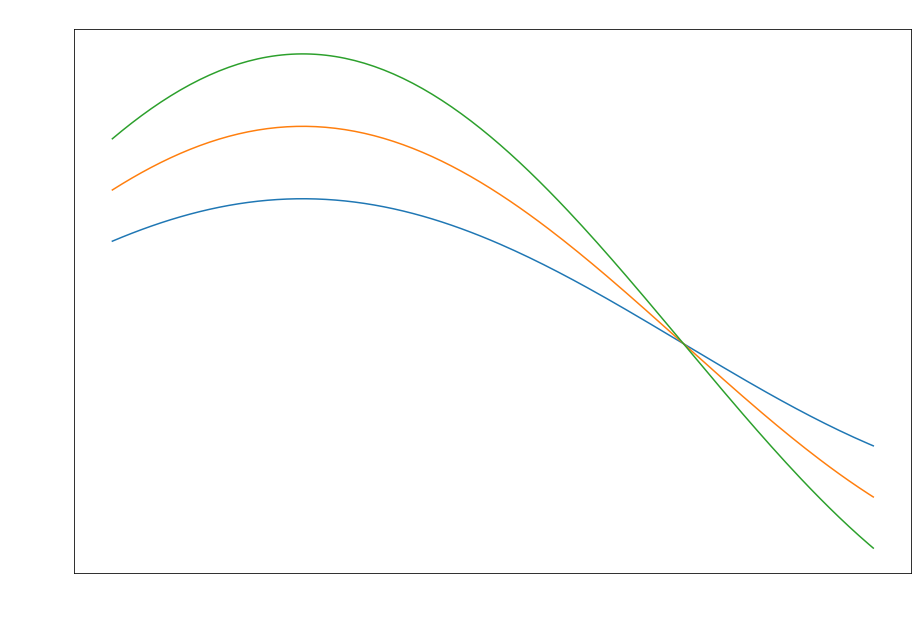

In [105]:
x,y = np.where(I==1)

plt.figure(figsize=(15,10))
rho_stack = []

for i in range(0,x.size):
    rhos = x[i] *np.cos(thetas) + y[i]* np.sin(thetas)
    rho_stack.append(rhos)
    plt.plot(np.rad2deg(thetas), rhos)
plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta - uhol v stupnoch")
plt.ylabel("Rhos - posunutie ak chcem trafit hranu")

In [106]:
rho_stack = np.array(rho_stack)

r1 = np.abs(rho_stack[0,:]-rho_stack[1,:])
r2 = np.abs(rho_stack[0,:]-rho_stack[2,:])
r3 = np.abs(rho_stack[1,:]-rho_stack[2,:])

min_dif = np.where((r1+r2+r3) == np.min(r1+r2+r3) )

rho_winner = rho_stack[0, min_dif]
theta_winner = thetas[min_dif]

display("We found fitting  line with params Rho: {} pixels and Theta {} degrees".format(rho_winner,np.rad2deg(theta_winner)))

'We found fitting  line with params Rho: [[-0.10763581]] pixels and Theta [135.21803965] degrees'

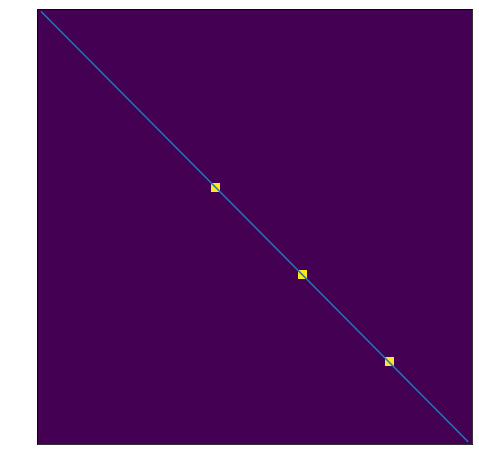

In [107]:
line_x = np.array([[0, I.shape[1]-1]])
line_y = (-np.cos(theta_winner)/np.sin(theta_winner))*line_x + rho_winner/np.sin(theta_winner)
plt.figure(figsize=(8,8))
plt.imshow(I)
plt.plot(line_x.ravel(),line_y.ravel())

In [108]:
accumulator = []
for i in range(0,x.size):
    rhos = x[i] *np.cos(thetas) + y[i]* np.sin(thetas)
    accumulator.append(rhos)
accumulator = np.array(rho_stack)

D = np.sqrt(I.shape[0]**2+ I.shape[1]**2) #uhlopriecka
rho_range =np.arange(-I.shape[1],D,1)   # ake realne hodnoty moze naberat priamka v obraze?

In [109]:
hough_space = np.zeros((rho_range.size, thetas.size))

Text(0, 0.5, 'Rhos - premapovane do disk. priestoru 121')

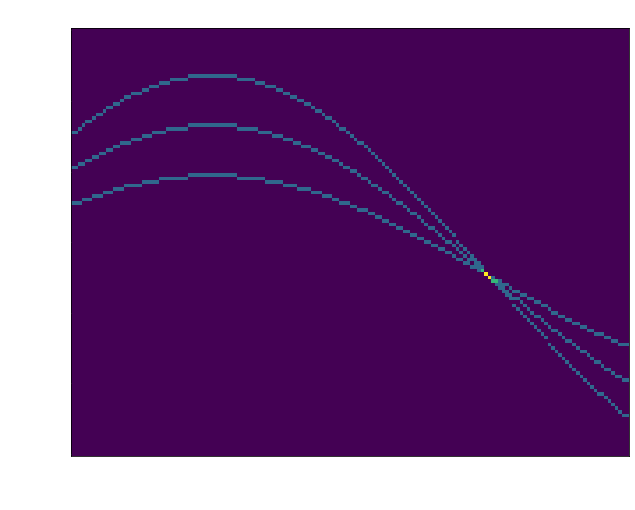

In [110]:
for i in range(0,thetas.size):
    rho_vals = accumulator[:,i]
    y_hist, x_hist = np.histogram(rho_vals, rho_range)

    hough_space[:hough_space.shape[0]-1, i] = np.flipud(y_hist)
plt.figure(figsize=(10,10))
plt.imshow(hough_space)

plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta - premapovane do disk. priestoru 158")
plt.ylabel("Rhos - premapovane do disk. priestoru 121")

In [111]:
max_hough = np.max(hough_space)
x, y = np.where(hough_space == max_hough)
theta_winner= thetas[y[1]]
rho_winner = rho_range[rho_range.size - x[1]]

display("We found fitting  line with params Rho: {} pixels and Theta {} degrees".format([rho_winner],np.rad2deg(theta_winner)))

'We found fitting  line with params Rho: [1.0] pixels and Theta 135.2180396508743 degrees'

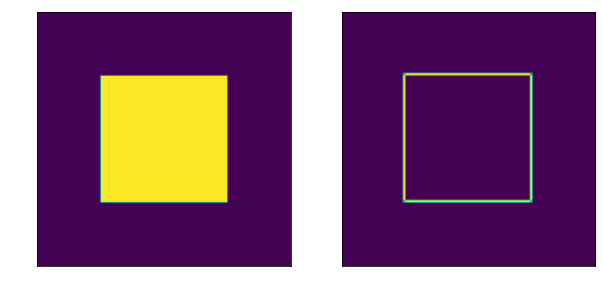

In [112]:
plt.figure(figsize=(10,10))
I = np.zeros((100, 100))
I[25:75,25:75] = 255
plt.subplot(121)
plt.imshow(I)
I = filters.roberts(I)
plt.subplot(122)
plt.imshow(I)

In [113]:
width, height = I.shape
D = (height**2 + width**2)**(1/2)

thetas = np.arange(0,np.pi,0.01)
rhos = np.arange(-width,D,1)

hough_space = np.zeros((rhos.size, thetas.size))

In [114]:
x, y = np.where(I > 0)

In [115]:
accumulator = np.zeros((x.size, thetas.size))

cos_vals = np.matmul(np.expand_dims(np.arange(0,width,1),axis=0).T,
                     np.expand_dims(np.cos(thetas),axis=0))

sin_vals = np.matmul(np.expand_dims(np.arange(0,height,1),axis=0).T,
                     np.expand_dims(np.sin(thetas),axis=0))

In [116]:
x_match = cos_vals[x,:]
y_match = sin_vals[y,:]

accumulator[:,:] =  x_match + y_match

for i in range(0,thetas.size):
    rho_vals = accumulator[:,i]
    y_hist, x_hist = np.histogram(rho_vals, rhos)
    hough_space[1:,i] = np.flipud(y_hist)

Text(0, 0.5, 'Rhos')

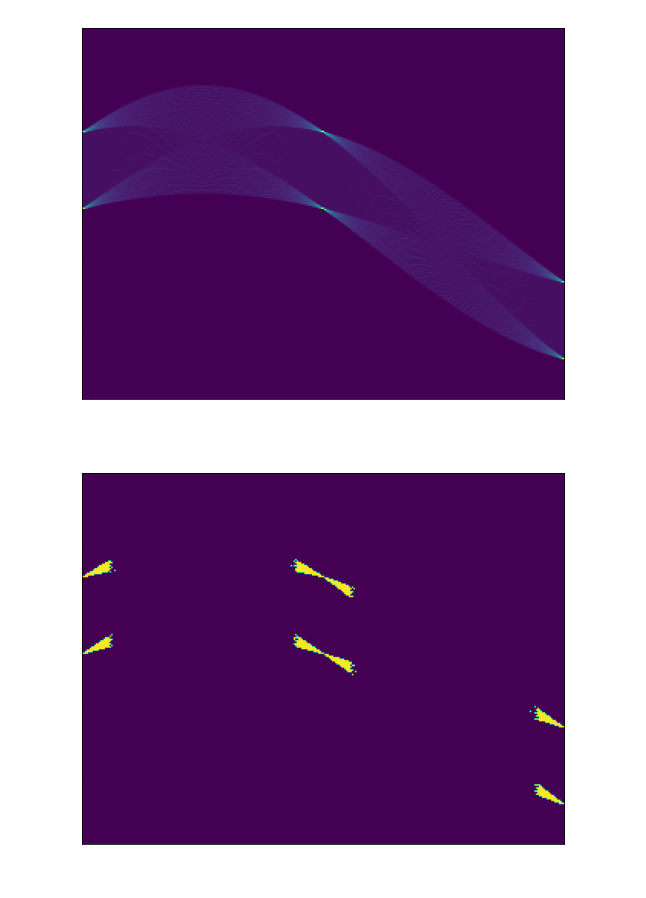

In [117]:
plt.figure(figsize=(25,15))
plt.subplot(211)
plt.imshow(hough_space)
plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta")
plt.ylabel("Rhos")
plt.subplot(212)
plt.imshow(hough_space> np.percentile(hough_space,99))
plt.title("Houghov priestor parametrov Rho a Theta 99th percentile")
plt.xlabel("Theta")
plt.ylabel("Rhos")

In [118]:
thresh = 0.5*np.max(hough_space[:])
supp = 15

continue_search = 1
peaks = []

[[67, 0], [67, 156], [117, 0], [117, 156], [165, 313], [215, 313]]


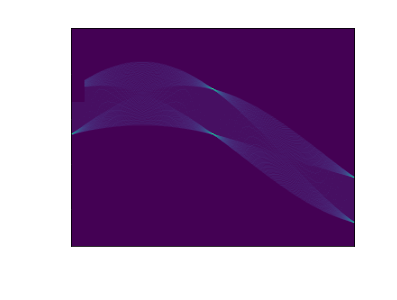

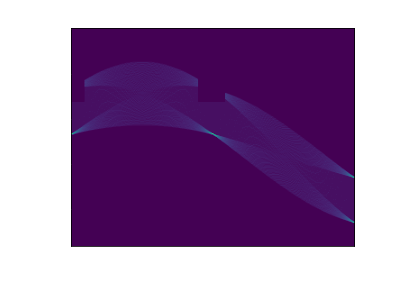

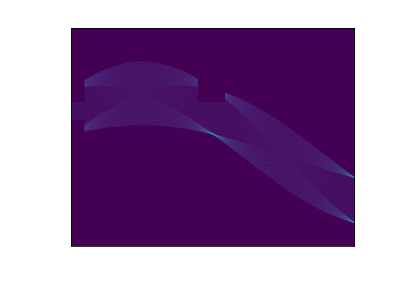

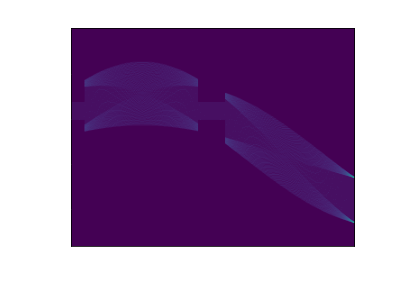

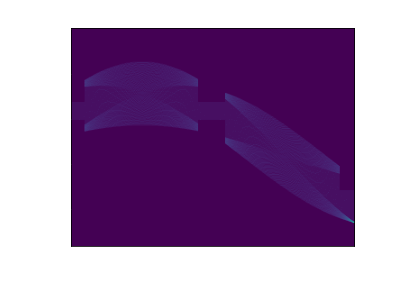

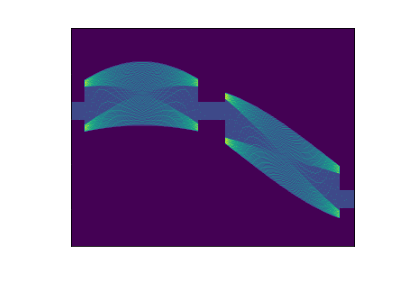

<Figure size 432x288 with 0 Axes>

In [119]:
while continue_search == 1:
    value = np.max(hough_space[:])

    if value>thresh:
        index = np.where(hough_space[:] == value)
        index_rho, index_theta = index[0][0], index[1][0]
        peaks.append([(index_rho), (index_theta)])
        x_min = index_rho - supp
        if x_min < 0:
            x_min = 0
        x_max = index_rho + supp
        if x_max > hough_space.shape[0]:
            x_max = hough_space.shape[0]
        y_min = index_theta - supp
        if y_min < 0:
            y_min = 0
        y_max = index_theta + supp
        if y_max > hough_space.shape[1]:
            y_max = hough_space.shape[1]

        hough_space[x_min:x_max, y_min:y_max] = 0
        plt.imshow(hough_space)
        plt.title("Houghov priestor, prehladavanie")
        plt.xlabel("Theta (radiany)")
        plt.ylabel("Rho (pixely)")
        plt.figure()

    else:
        continue_search = 0

print(peaks)

<ipython-input-120-73d04b83c76a>:12: RuntimeWarning: divide by zero encountered in double_scalars
  line_y = (-np.cos(theta)/np.sin(theta))*line_x + rho/np.sin(theta)
<ipython-input-120-73d04b83c76a>:12: RuntimeWarning: invalid value encountered in multiply
  line_y = (-np.cos(theta)/np.sin(theta))*line_x + rho/np.sin(theta)
<ipython-input-120-73d04b83c76a>:12: RuntimeWarning: invalid value encountered in add
  line_y = (-np.cos(theta)/np.sin(theta))*line_x + rho/np.sin(theta)
<ipython-input-120-73d04b83c76a>:16: RuntimeWarning: divide by zero encountered in double_scalars
  line_x = (line_y - rho/np.sin(theta))*(np.sin(theta)/np.cos(theta))
<ipython-input-120-73d04b83c76a>:16: RuntimeWarning: invalid value encountered in multiply
  line_x = (line_y - rho/np.sin(theta))*(np.sin(theta)/np.cos(theta))


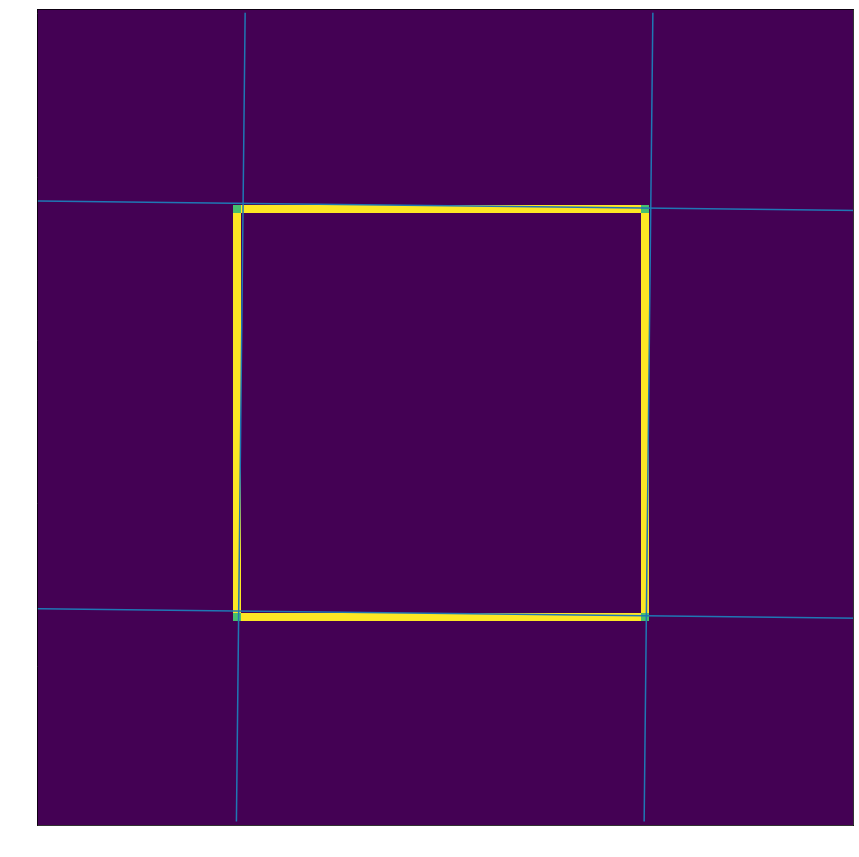

In [120]:
import matplotlib.lines as lines

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(I)

for peak in peaks:
    theta = thetas[peak[1]]
    rho = rhos[rhos.size - peak[0]]

    line_x = np.array([[0, I.shape[1]-1]])
    line_y = (-np.cos(theta)/np.sin(theta))*line_x + rho/np.sin(theta)

    if np.sum(np.isnan(line_y)) > 0:
        line_y = np.array([[0, I.shape[0]-1]])
        line_x = (line_y - rho/np.sin(theta))*(np.sin(theta)/np.cos(theta))

    ax.add_line(lines.Line2D(line_y, line_x))

plt.show()